In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from pathlib import Path


In [3]:
#import data
coffee_data = Path('coffee-shop-sales-revenue.csv')

print(coffee_data)

coffee-shop-sales-revenue.csv


In [4]:
#Read in the data
coffee_df = pd.read_csv(coffee_data, sep='|')

#Print out the first and last five rows
display(coffee_df.head(2))
display(coffee_df.tail(2))

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [5]:
#Clean the data

#Check for nulls
display(coffee_df.isnull().mean() * 100)

#remove nulls
coffee_df = coffee_df.dropna()

#Check for duplicates
display(coffee_df.duplicated().sum())

#Remove duplicates
coffee_df = coffee_df.drop_duplicates()

#Combine date and time columns into new column
coffee_df['salesdatetime'] = coffee_df['transaction_date'].astype(str) + ' ' + coffee_df['transaction_time'].astype(str)

#Convert new column to datetime
coffee_df['salesdatetime'] = pd.to_datetime(coffee_df['salesdatetime'])

#Check data types
display(coffee_df.dtypes)

#Print out the first and last five rows
display(coffee_df.head(2))
display(coffee_df.tail(2))


transaction_id      0.0
transaction_date    0.0
transaction_time    0.0
transaction_qty     0.0
store_id            0.0
store_location      0.0
product_id          0.0
unit_price          0.0
product_category    0.0
product_type        0.0
product_detail      0.0
dtype: float64

0

transaction_id               int64
transaction_date            object
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
salesdatetime       datetime64[ns]
dtype: object

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,salesdatetime
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,salesdatetime
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 20:57:19
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,2023-06-30 20:57:19


In [6]:
#Create a new column for total sales
coffee_df['totalsales'] = coffee_df['transaction_qty'] * coffee_df['unit_price']

#Create a new column for month
coffee_df['month'] = coffee_df['salesdatetime'].dt.month

#print(coffee_df['month'])
#print(coffee_df['salesdatetime'].dt.year)
#print(coffee_df['salesdatetime'].dt.day)
#Create a new column for the week of the year
coffee_df['weekofyear'] = pd.to_datetime(coffee_df['salesdatetime']).dt.strftime('%U')

#Create a new column for day of week
coffee_df['dayofweek'] = coffee_df['salesdatetime'].dt.dayofweek

#Create a new column for hour
coffee_df['hour'] = coffee_df['salesdatetime'].dt.hour

#Print out the first and last 2 rows
display(coffee_df.head(2))
display(coffee_df.tail(2))



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,salesdatetime,totalsales,month,weekofyear,dayofweek,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,6.0,1,01,6,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,6.2,1,01,6,7


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,salesdatetime,totalsales,month,weekofyear,dayofweek,hour
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 20:57:19,3.75,6,26,4,20
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,2023-06-30 20:57:19,1.60,6,26,4,20


In [7]:
#Create a dataframe for each store
store1_df = coffee_df.loc[coffee_df['store_id'] == 3]
store2_df = coffee_df.loc[coffee_df['store_id'] == 5]
store3_df = coffee_df.loc[coffee_df['store_id'] == 8]

#Reset the index for each store to sale datetime
store1_df = store1_df.set_index('salesdatetime')
store2_df = store2_df.set_index('salesdatetime')
store3_df = store3_df.set_index('salesdatetime')


#Print out the first and last 2 rows of each store
display(store1_df.head(2))
display(store1_df.tail(2))

display(store2_df.head(2))
display(store2_df.tail(2))

display(store3_df.head(2))
display(store3_df.tail(2))



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-01-01 11:01:48,106,2023-01-01,11:01:48,1,3,Astoria,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,01,6,11
2023-01-01 11:01:58,107,2023-01-01,11:01:58,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte,3.75,1,01,6,11


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-06-30 19:57:49,149448,2023-06-30,19:57:49,2,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg,5.00,6,26,4,19
2023-06-30 19:57:49,149449,2023-06-30,19:57:49,1,3,Astoria,70,3.25,Bakery,Scone,Cranberry Scone,3.25,6,26,4,19


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-01-01 07:06:11,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,01,6,7
2023-01-01 07:08:56,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,1,01,6,7


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-06-30 19:40:09,149435,2023-06-30,19:40:09,2,5,Lower Manhattan,58,3.5,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.0,6,26,4,19
2023-06-30 20:16:31,149451,2023-06-30,20:16:31,2,5,Lower Manhattan,42,2.5,Tea,Brewed herbal tea,Lemon Grass Rg,5.0,6,26,4,20


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-01-01 08:00:18,18,2023-01-01,08:00:18,1,8,Hell's Kitchen,42,2.5,Tea,Brewed herbal tea,Lemon Grass Rg,2.5,1,01,6,8
2023-01-01 08:00:39,19,2023-01-01,08:00:39,2,8,Hell's Kitchen,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,1,01,6,8


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,totalsales,month,weekofyear,dayofweek,hour
salesdatetime,,,,,,,,,,,,,,,,
2023-06-30 20:57:19,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,6,26,4,20
2023-06-30 20:57:19,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,1.60,6,26,4,20


In [8]:
#Create a custom function to sum total sales
def sum_totalsales(df):
    return df['totalsales'].sum()

#create a custom function to calculate average sales
def avg_totalsales(df):
    return df['totalsales'].mean()


In [9]:
#Create a dataframe for each store's total sales using the custom function by month
store1_totalsales = store1_df.groupby('month').apply(sum_totalsales)
store2_totalsales = store2_df.groupby('month').apply(sum_totalsales)
store3_totalsales = store3_df.groupby('month').apply(sum_totalsales)

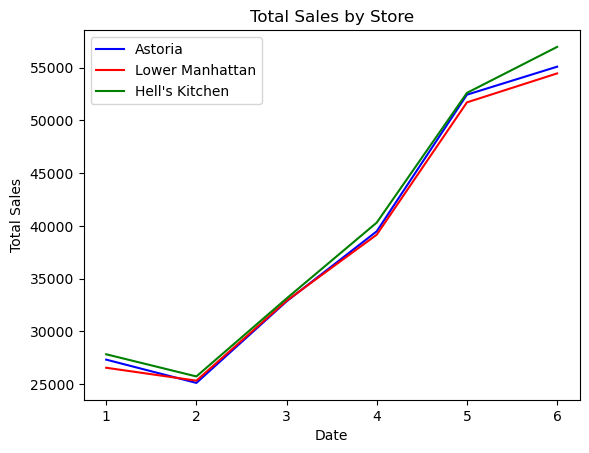

<Figure size 6000x1000 with 0 Axes>

In [10]:
#Dispalay the total sales for each store as a line graph
plt.plot(store1_totalsales, label='Astoria', color='blue')
plt.plot(store2_totalsales, label='Lower Manhattan', color='red')
plt.plot(store3_totalsales, label="Hell's Kitchen", color='green')


plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.legend(loc='best')
plt.figure(figsize=(60,10))

plt.show()


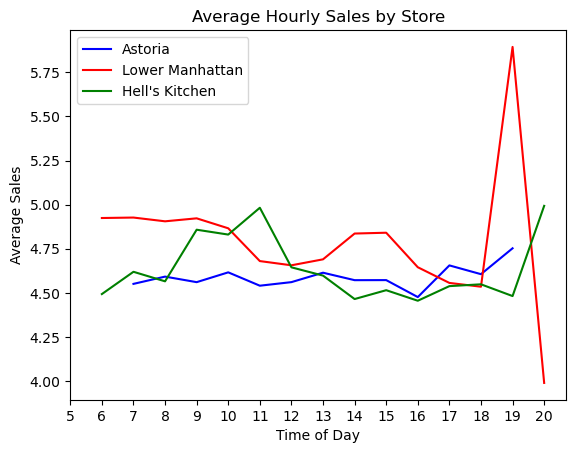

<Figure size 6000x1000 with 0 Axes>

In [11]:
#Create a dataframe for each store's average sales using the custom function by hour
store1_avgsales = store1_df.groupby('hour').apply(avg_totalsales)
store2_avgsales = store2_df.groupby('hour').apply(avg_totalsales)
store3_avgsales = store3_df.groupby('hour').apply(avg_totalsales)

#Dispalay the average sales for each store as a line graph
plt.plot(store1_avgsales, label='Astoria', color='blue')
plt.plot(store2_avgsales, label='Lower Manhattan', color='red')
plt.plot(store3_avgsales, label="Hell's Kitchen", color='green')

#Change the x axis to display hours as 12 hour time label starting at 6am and ending at 8pm
plt.xticks(np.arange(5, 21, 1))


plt.xlabel('Time of Day')
plt.ylabel('Average Sales')
plt.title('Average Hourly Sales by Store')
plt.legend(loc='best')
plt.figure(figsize=(60,10))

plt.show()



<Figure size 6000x1000 with 0 Axes>

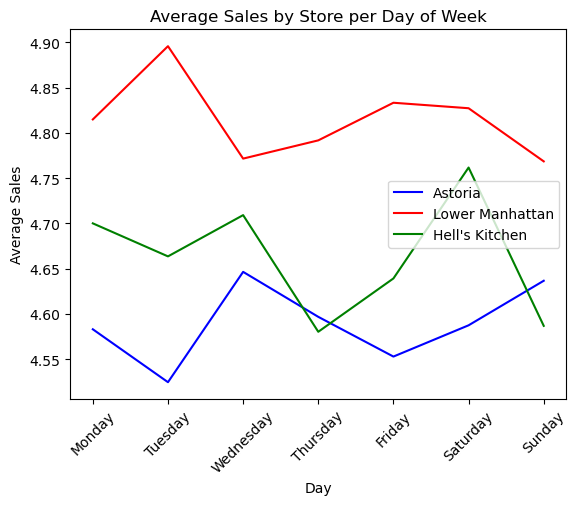

<Figure size 6000x1000 with 0 Axes>

In [12]:
#Create a dataframe for each store's average sales using the custom function by day of week
store1_avgsales = store1_df.groupby('dayofweek').apply(avg_totalsales)
store2_avgsales = store2_df.groupby('dayofweek').apply(avg_totalsales)
store3_avgsales = store3_df.groupby('dayofweek').apply(avg_totalsales)

#Dispalay the average sales for each store as a line graph
plt.plot(store1_avgsales, label='Astoria', color='blue')
plt.plot(store2_avgsales, label='Lower Manhattan', color='red')
plt.plot(store3_avgsales, label="Hell's Kitchen", color='green')

#Change the x axis labels to day of week names
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), rotation=45)

plt.xlabel('Day')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store per Day of Week')
plt.legend(loc='best')
plt.figure(figsize=(60,10))


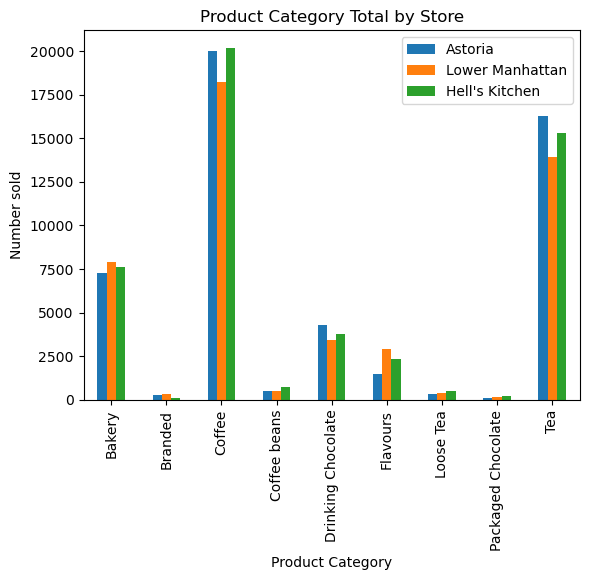

In [13]:
#Product analysis

#See what type of products are sold
#coffee_df['product_category'].unique()

#Count number of each product category sold for each store
product_type_totals_store1 = store1_df['product_category'].value_counts()
product_type_totals_store2 = store2_df['product_category'].value_counts()
product_type_totals_store3 = store3_df['product_category'].value_counts()

#New dataframe with these counts
product_type_totals_all_stores = pd.DataFrame({
    'Astoria': product_type_totals_store1,
    'Lower Manhattan': product_type_totals_store2,
    "Hell's Kitchen": product_type_totals_store3
})

#Plotting in a bar chat
product_type_totals_all_stores.plot(kind='bar')
plt.title('Product Category Total by Store')
plt.xlabel("Product Category")
plt.ylabel("Number sold")
plt.show()


In [14]:
# Based on the above graph, we can see that coffee is the most popular product category for all stores.
# Let's see what types of coffee products are the most popular for each store.
# First we will look at the transaction quantity of each coffee product sold for each store.

# Function to get best coffee products for a given store
def get_best_coffee_products(store_df):
    coffee_products = store_df.loc[store_df['product_category'] == 'Coffee', ['product_type', 'transaction_qty']]
    grouped_coffee_products = coffee_products.groupby('product_type').sum()
    return grouped_coffee_products

# Get best coffee products for each store
best_coffee_store1 = get_best_coffee_products(store1_df)
best_coffee_store2 = get_best_coffee_products(store2_df)
best_coffee_store3 = get_best_coffee_products(store3_df)

print(f"Product Type sold at Astoria" + "\n" + str(best_coffee_store1))
print(f"Product Type sold at Lower Manhattan" + "\n" + str(best_coffee_store2))
print(f"Product Type sold at Hell's Kitchen" + "\n" + str(best_coffee_store3))

Product Type sold at Astoria
                       transaction_qty
product_type                          
Barista Espresso                  7345
Drip coffee                       4577
Gourmet brewed coffee             8938
Organic brewed coffee             4344
Premium brewed coffee             4451
Product Type sold at Lower Manhattan
                       transaction_qty
product_type                          
Barista Espresso                  8534
Drip coffee                       3972
Gourmet brewed coffee             8563
Organic brewed coffee             4150
Premium brewed coffee             4156
Product Type sold at Hell's Kitchen
                       transaction_qty
product_type                          
Barista Espresso                  9064
Drip coffee                       4342
Gourmet brewed coffee             8472
Organic brewed coffee             4518
Premium brewed coffee             3824


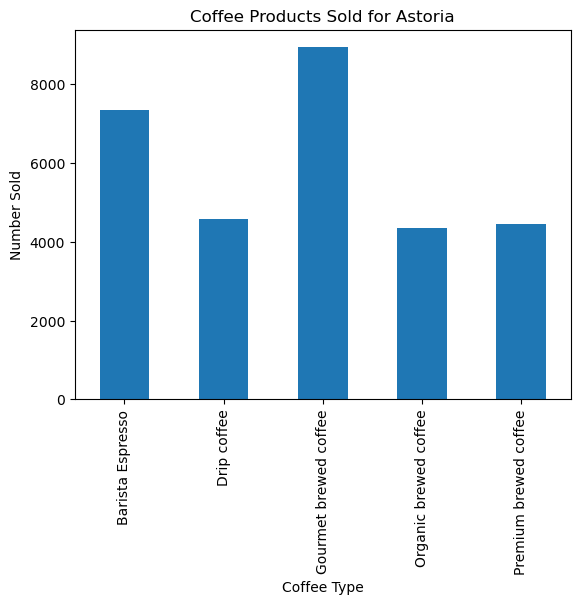

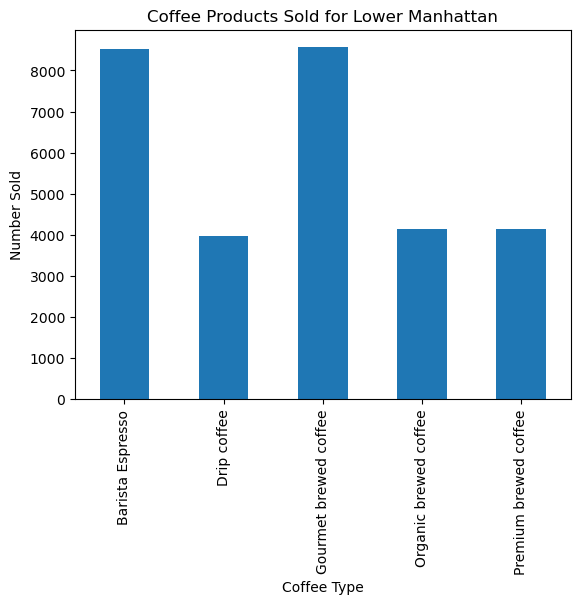

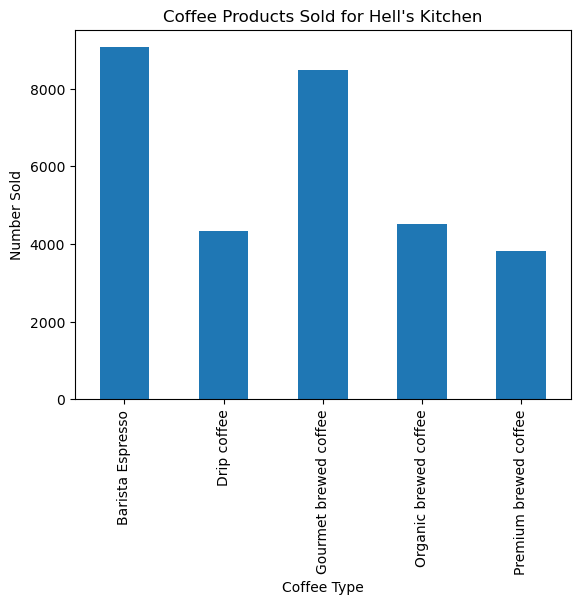

In [15]:
# Bar graph for each store
# Function to get best coffee products for a given store
def get_best_coffee_products(store_df):
    coffee_products = store_df.loc[store_df['product_category'] == 'Coffee', ['product_type', 'transaction_qty']]
    grouped_coffee_products = coffee_products.groupby('product_type').sum()
    return grouped_coffee_products

# Get best coffee products for each store
best_coffee_store1 = get_best_coffee_products(store1_df)
best_coffee_store2 = get_best_coffee_products(store2_df)
best_coffee_store3 = get_best_coffee_products(store3_df)

# Prepare data for a bar graph
store_names = ["Astoria", "Lower Manhattan", "Hell's Kitchen"]
dfs = [best_coffee_store1, best_coffee_store2, best_coffee_store3]

# Plotting in a bar chart
for store_name, best_coffee_products in zip(store_names, dfs):
    best_coffee_products.plot(kind='bar', legend=False)
    plt.title(f'Coffee Products Sold for {store_name}')
    plt.xlabel("Coffee Type")
    plt.ylabel("Number Sold")
    plt.show()

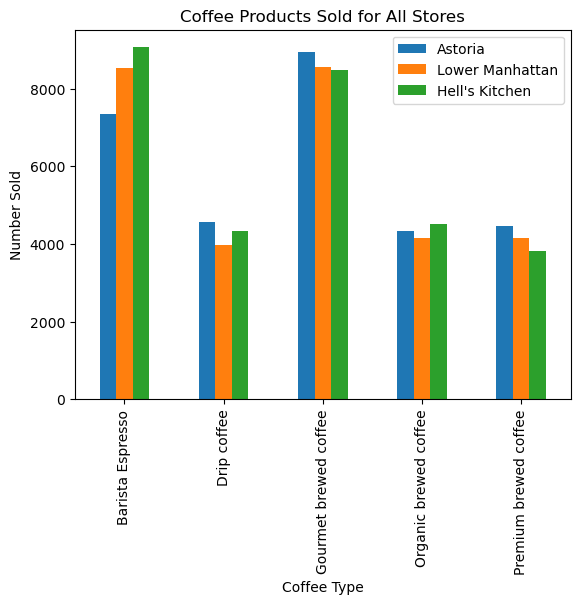

In [16]:
# Combined bar graph for all stores
def get_best_coffee_products(store_df):
    coffee_products = store_df.loc[store_df['product_category'] == 'Coffee', ['product_type', 'transaction_qty']]
    grouped_coffee_products = coffee_products.groupby('product_type').sum()
    return grouped_coffee_products

# Get best coffee products for each store
best_coffee_store1 = get_best_coffee_products(store1_df)
best_coffee_store2 = get_best_coffee_products(store2_df)
best_coffee_store3 = get_best_coffee_products(store3_df)

# Combine data for all stores into a single DataFrame
combined_data = pd.concat([best_coffee_store1, best_coffee_store2, best_coffee_store3], axis=1)
combined_data.columns = ["Astoria", "Lower Manhattan", "Hell's Kitchen"]

# Plotting in a single bar chart
combined_data.plot(kind='bar')
plt.title('Coffee Products Sold for All Stores')
plt.xlabel("Coffee Type")
plt.ylabel("Number Sold")
plt.legend(loc='best')
plt.show()

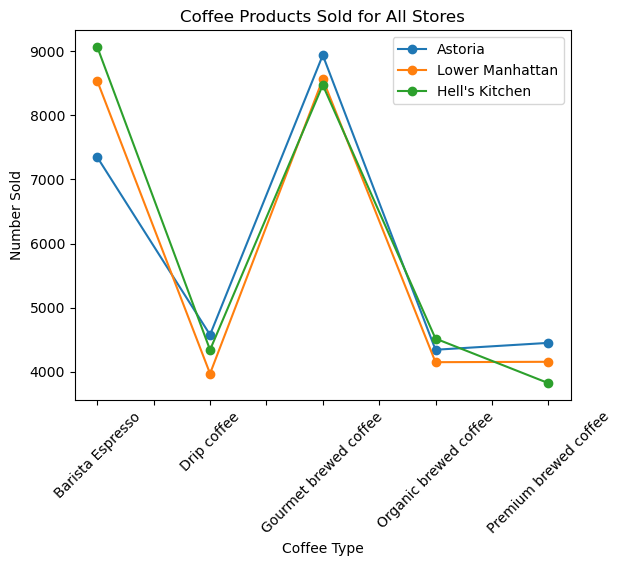

In [17]:
#Line graph for all stores
def get_best_coffee_products(store_df):
    coffee_products = store_df.loc[store_df['product_category'] == 'Coffee', ['product_type', 'transaction_qty']]
    grouped_coffee_products = coffee_products.groupby('product_type').sum()
    return grouped_coffee_products

# Get best coffee products for each store
best_coffee_store1 = get_best_coffee_products(store1_df)
best_coffee_store2 = get_best_coffee_products(store2_df)
best_coffee_store3 = get_best_coffee_products(store3_df)

# Combine data for all stores into a single DataFrame
combined_data = pd.concat([best_coffee_store1, best_coffee_store2, best_coffee_store3], axis=1)
combined_data.columns = ["Astoria", "Lower Manhattan", "Hell's Kitchen"]

# Plotting in a line chart
combined_data.plot(kind='line', marker='o', linestyle='-')

# Set the title and labels
plt.title('Coffee Products Sold for All Stores')
plt.xlabel("Coffee Type")
plt.ylabel("Number Sold")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [18]:
#Finding the total sales for each coffee type for each store
store1_coffee_df = store1_df.loc[store1_df['product_category'] == 'Coffee']
store2_coffee_df = store2_df.loc[store2_df['product_category'] == 'Coffee']
store3_coffee_df = store3_df.loc[store3_df['product_category'] == 'Coffee']

# Create a dataframe for each store's coffee sales by product
store1_coffee_totals = store1_coffee_df.groupby('product_type')['totalsales'].sum()
store2_coffee_totals = store2_coffee_df.groupby('product_type')['totalsales'].sum()
store3_coffee_totals = store3_coffee_df.groupby('product_type')['totalsales'].sum()

print(f"What are Astoria's total sales for each coffee type?", store1_coffee_totals)
print(f"What are Lower Manhattan's total sales for each coffee type?", store2_coffee_totals)
print(f"What are Hell's Kitchen's total sales for each coffee type?", store3_coffee_totals)

What are Astoria's total sales for each coffee type? product_type
Barista Espresso         27935.0
Drip coffee              11416.5
Gourmet brewed coffee    23823.3
Organic brewed coffee    12623.2
Premium brewed coffee    13946.3
Name: totalsales, dtype: float64
What are Lower Manhattan's total sales for each coffee type? product_type
Barista Espresso         31051.0
Drip coffee               9817.0
Gourmet brewed coffee    23201.2
Organic brewed coffee    12009.3
Premium brewed coffee    12907.0
Name: totalsales, dtype: float64
What are Hell's Kitchen's total sales for each coffee type? product_type
Barista Espresso         32420.20
Drip coffee              10750.50
Gourmet brewed coffee    23010.10
Organic brewed coffee    13114.00
Premium brewed coffee    11927.85
Name: totalsales, dtype: float64


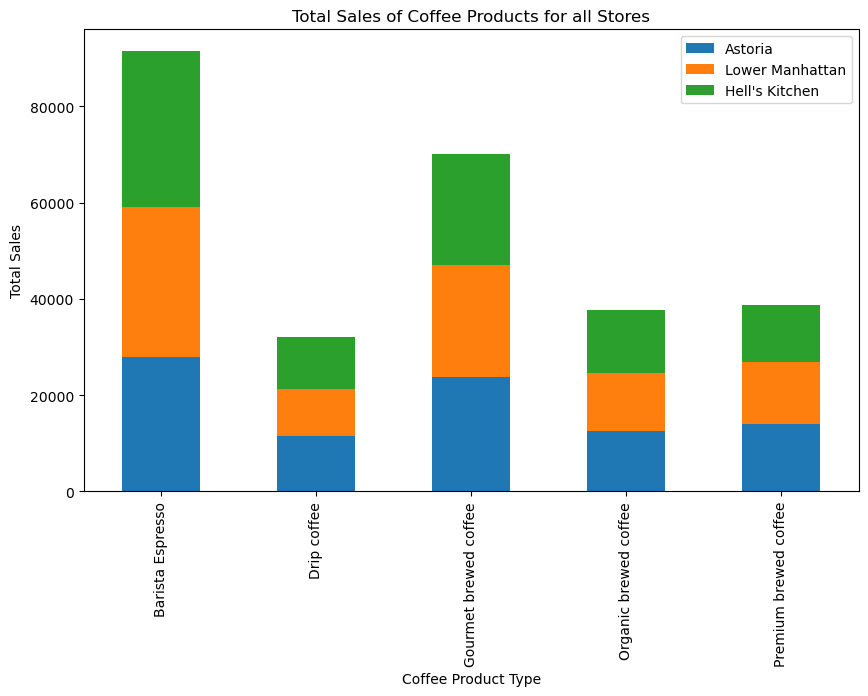

In [19]:
#Stacked bar graph showing total sales for each coffee type for each store
store1_coffee_df = store1_df.loc[store1_df['product_category'] == 'Coffee']
store2_coffee_df = store2_df.loc[store2_df['product_category'] == 'Coffee']
store3_coffee_df = store3_df.loc[store3_df['product_category'] == 'Coffee']

# Create a dataframe for each store's coffee sales by product
store1_coffee_totals = store1_coffee_df.groupby('product_type')['totalsales'].sum()
store2_coffee_totals = store2_coffee_df.groupby('product_type')['totalsales'].sum()
store3_coffee_totals = store3_coffee_df.groupby('product_type')['totalsales'].sum()

# Combine the three DataFrames into a single DataFrame for easy plotting
combined_coffee_totals = pd.concat([store1_coffee_totals, store2_coffee_totals, store3_coffee_totals], axis=1)
combined_coffee_totals.columns = ['Astoria', 'Lower Manhattan', "Hell's Kitchen"]

# Plotting in a bar chart
combined_coffee_totals.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales of Coffee Products for all Stores')
plt.xlabel('Coffee Product Type')
plt.ylabel('Total Sales')
plt.legend(title='')
plt.show()


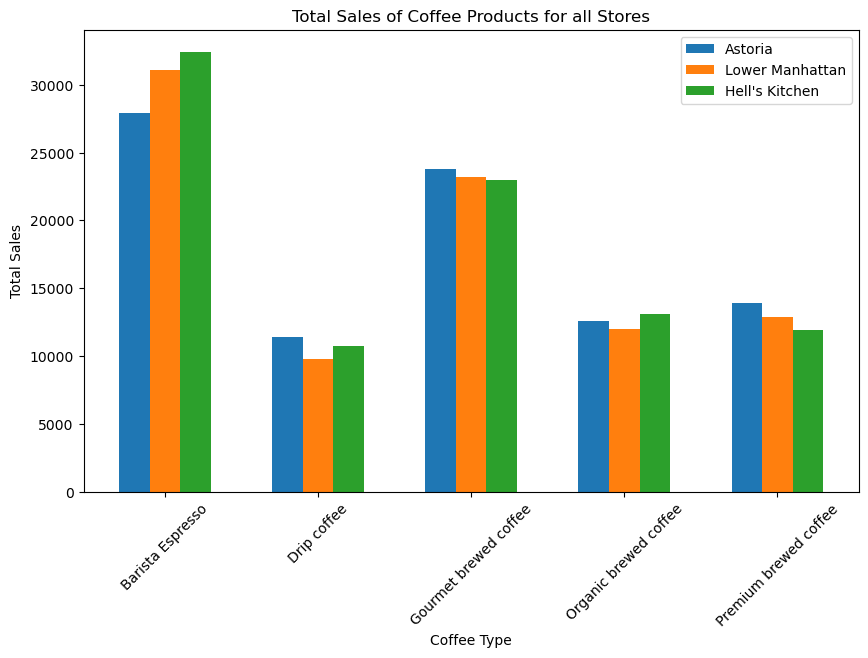

In [20]:
#Unstacked bar graph showing total sales for each coffee type for each store
store1_coffee_df = store1_df.loc[store1_df['product_category'] == 'Coffee']
store2_coffee_df = store2_df.loc[store2_df['product_category'] == 'Coffee']
store3_coffee_df = store3_df.loc[store3_df['product_category'] == 'Coffee']

# Create a dataframe for each store's coffee sales by product
store1_coffee_totals = store1_coffee_df.groupby('product_type')['totalsales'].sum()
store2_coffee_totals = store2_coffee_df.groupby('product_type')['totalsales'].sum()
store3_coffee_totals = store3_coffee_df.groupby('product_type')['totalsales'].sum()

# Combine the three DataFrames into a single DataFrame for easy plotting
combined_coffee_totals = pd.concat([store1_coffee_totals, store2_coffee_totals, store3_coffee_totals], axis=1)
combined_coffee_totals.columns = ['Astoria', 'Lower Manhattan', "Hell's Kitchen"]

# Transpose the DataFrame for easier plotting
combined_coffee_totals = combined_coffee_totals.transpose()

# Plotting in a bar chart
width = 0.2  # Width of each bar
ind = np.arange(len(combined_coffee_totals.columns))

fig, ax = plt.subplots(figsize=(10, 6))

for i, store in enumerate(combined_coffee_totals.index):
    ax.bar(ind + i * width, combined_coffee_totals.loc[store], width=width, label=store)

ax.set_title('Total Sales of Coffee Products for all Stores')
ax.set_xlabel('Coffee Type')
ax.set_ylabel('Total Sales')
ax.set_xticks(ind + width * (len(combined_coffee_totals) - 1) / 2)
ax.set_xticklabels(combined_coffee_totals.columns)
plt.xticks(rotation=45)
plt.legend(title='')
plt.show()

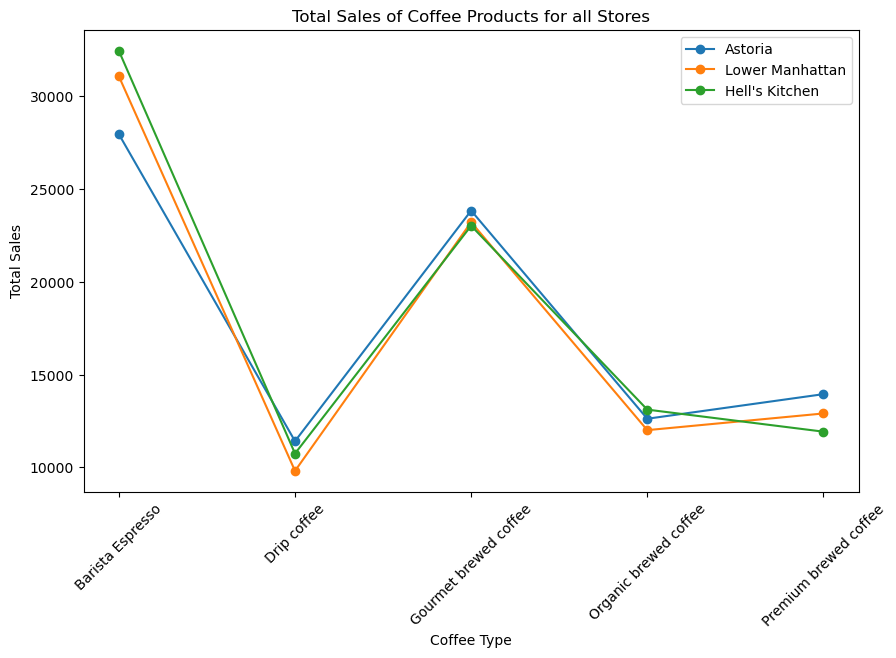

In [21]:
#Line graph showing total sales for each coffee type for each store
store1_coffee_df = store1_df.loc[store1_df['product_category'] == 'Coffee']
store2_coffee_df = store2_df.loc[store2_df['product_category'] == 'Coffee']
store3_coffee_df = store3_df.loc[store3_df['product_category'] == 'Coffee']

# Create a dataframe for each store's coffee sales by product
store1_coffee_totals = store1_coffee_df.groupby('product_type')['totalsales'].sum()
store2_coffee_totals = store2_coffee_df.groupby('product_type')['totalsales'].sum()
store3_coffee_totals = store3_coffee_df.groupby('product_type')['totalsales'].sum()

# Combine the three DataFrames into a single DataFrame for easy plotting
combined_coffee_totals = pd.concat([store1_coffee_totals, store2_coffee_totals, store3_coffee_totals], axis=1)
combined_coffee_totals.columns = ['Astoria', 'Lower Manhattan', "Hell's Kitchen"]

# Transpose the DataFrame for easier plotting
combined_coffee_totals = combined_coffee_totals.transpose()

# Plotting in a line graph
ind = np.arange(len(combined_coffee_totals.columns))

fig, ax = plt.subplots(figsize=(10, 6))

for store in combined_coffee_totals.index:
    ax.plot(ind, combined_coffee_totals.loc[store], label=store, marker='o')

ax.set_title('Total Sales of Coffee Products for all Stores')
ax.set_xlabel('Coffee Type')
ax.set_ylabel('Total Sales')
ax.set_xticks(ind)
ax.set_xticklabels(combined_coffee_totals.columns)
plt.xticks(rotation=45)
ax.legend(title='')

plt.show()

In [36]:
def get_product_detail(store_df):
    coffee_products = store_df.loc[store_df['product_category'] == 'Coffee', ['product_type', 'product_detail', 'unit_price']]
    grouped_coffee_products = coffee_products.groupby(['product_type', 'product_detail']).mean()
    return grouped_coffee_products

# Get best coffee products for each store
coffee_product_detail_store1 = get_product_detail(store1_df)
coffee_product_detail_store2 = get_product_detail(store2_df)
coffee_product_detail_store3 = get_product_detail(store3_df)

# Print the results with rounding to 2 decimal points
print(f"Unit price and sizes for each coffee product at Astoria" + "\n" + str(coffee_product_detail_store1.round(2)))
print(f"Unit price and sizes for each coffee product at Lower Manhattan" + "\n" + str(coffee_product_detail_store2.round(2)))
print(f"Unit price and sizes for each coffee product at Hell's Kitchen" + "\n" + str(coffee_product_detail_store3.round(2)))


Unit price and sizes for each coffee product at Astoria
                                                   unit_price
product_type          product_detail                         
Barista Espresso      Cappuccino                         3.75
                      Cappuccino Lg                      4.25
                      Espresso shot                      3.00
                      Latte                              3.75
                      Latte Rg                           4.25
Drip coffee           Our Old Time Diner Blend Lg        3.00
                      Our Old Time Diner Blend Rg        2.50
                      Our Old Time Diner Blend Sm        2.00
Gourmet brewed coffee Columbian Medium Roast Lg          3.00
                      Columbian Medium Roast Rg          2.50
                      Columbian Medium Roast Sm          2.00
                      Ethiopia Lg                        3.50
                      Ethiopia Rg                        3.00
              

In [49]:
# Unit price, transaction quantity and total sales for three stores with store locations
store1_df = {
    'store_location': 'Astoria',
    'product_type': ['Barista Espresso', 'Drip Coffee', 'Gourmet Brewed Coffee', 'Organic Brewed Coffee', 'Premium Brewed Coffee'],
    'transaction_quantity': [10, 15, 8, 12, 20],
    'unit_price': [2.5, 3.0, 3.5, 2.0, 2.8],
}

store2_df = {
    'store_location': 'Lower Manhattan',
    'product_type': ['Barista Espresso', 'Drip Coffee', 'Gourmet Brewed Coffee', 'Organic Brewed Coffee', 'Premium Brewed Coffee'],
    'transaction_quantity': [8, 12, 10, 15, 18],
    'unit_price': [2.7, 3.2, 3.6, 1.8, 2.9],
}

store3_df = {
    'store_location': "Hell's Kitchen",
    'product_type': ['Barista Espresso', 'Drip Coffee', 'Gourmet Brewed Coffee', 'Organic Brewed Coffee', 'Premium Brewed Coffee'],
    'transaction_quantity': [12, 18, 6, 10, 15],
    'unit_price': [2.3, 2.8, 3.2, 2.2, 3.1],
}

# Creating DataFrames for each store
store1_data = pd.DataFrame(store1_df)
store2_data = pd.DataFrame(store2_df)
store3_data = pd.DataFrame(store3_df)

# Concatenating DataFrames for all three stores
all_stores_data = pd.concat([store1_data, store2_data, store3_data], keys=['Store1', 'Store2', 'Store3'])

# Calculate total sales for each transaction
all_stores_data['total_sales'] = all_stores_data['transaction_quantity'] * all_stores_data['unit_price']

# Calculate profit margin and round unit price
all_stores_data['profit_margin'] = (all_stores_data['total_sales'] - (all_stores_data['transaction_quantity'] * all_stores_data['unit_price'])) / all_stores_data['total_sales']
all_stores_data['unit_price'] = all_stores_data['unit_price'].round(2)

# Display the DataFrame with profit margins, unit prices, and total sales (in thousands) for all three stores
all_stores_data['total_sales'] = (all_stores_data['total_sales'])
print(all_stores_data[['store_location', 'product_type', 'transaction_quantity', 'unit_price', 'total_sales']])


           store_location           product_type  transaction_quantity  \
Store1 0          Astoria       Barista Espresso                    10   
       1          Astoria            Drip Coffee                    15   
       2          Astoria  Gourmet Brewed Coffee                     8   
       3          Astoria  Organic Brewed Coffee                    12   
       4          Astoria  Premium Brewed Coffee                    20   
Store2 0  Lower Manhattan       Barista Espresso                     8   
       1  Lower Manhattan            Drip Coffee                    12   
       2  Lower Manhattan  Gourmet Brewed Coffee                    10   
       3  Lower Manhattan  Organic Brewed Coffee                    15   
       4  Lower Manhattan  Premium Brewed Coffee                    18   
Store3 0   Hell's Kitchen       Barista Espresso                    12   
       1   Hell's Kitchen            Drip Coffee                    18   
       2   Hell's Kitchen  Gourmet Bre